# This is the notebook to get all the statiscs form `newCSVwithClass` folder

In [1]:
# Import packages
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import os

In [2]:
# pix2nm is the dict that stores all the coefficient to convert pixel value to real nm data
# The format is { 'img_name' :  [pixelNum,nmNum]}
# in total the full name of all 12 testing images should be here
pix2nm = {'0501_300kx_1nm_clhaadf3_0010_results.csv' : [1024, 490],
          '0501_300kx_1nm_clhaadf3_0014_results.csv' : [1024, 490],
          '1ROI_100kx_4100CL_foil1_results.csv' : [1024, 890],
          '200kV_500kx_p2nm_8cmCL_grain1_0056 - Copy_results.csv' : [1024, 290], #[1024, 291.248],
          '200kV_500kx_p2nm_8cmCL_grain2_0036_results.csv' : [1024, 490],#[1024, 485.413],
          '5401_300kx_1nm_clhaadf3_0020_results.csv' : [1024, 490],
          '8ROI_100kx_4100CL_foil1_results.csv' : [1024, 890],
          'BF X500K, 06 (2)_results.csv' : [1024, 145],
          'g1_backonzone_GBtowardsfrom_0007_results.csv' : [2048, 290], #[2048, 291.248],
          'g2_midonzone_GBtowardsfront_0010_results.csv' : [2048, 290], #[2048, 291.248],
          'grid1_roi1_500kx_0p5nm_haadf1_0025_results.csv' : [1024, 290],
          'grid1_roi2_500kx_0p5nm_haadf1_0047_results.csv': [1024, 290]}

In [3]:
dict_ID2ImgName = {'11': 'grid1_roi2_500kx_0p5nm_haadf1_0047', '10': 'grid1_roi1_500kx_0p5nm_haadf1_0025', '1': '0501_300kx_1nm_clhaadf3_0014', '0': '0501_300kx_1nm_clhaadf3_0010', '3': '200kV_500kx_p2nm_8cmCL_grain1_0056 - Copy', '2': '1ROI_100kx_4100CL_foil1', '5': '5401_300kx_1nm_clhaadf3_0020', '4': '200kV_500kx_p2nm_8cmCL_grain2_0036', '7': 'BF X500K, 06 (2)', '6': '8ROI_100kx_4100CL_foil1', '9': 'g2_midonzone_GBtowardsfront_0010', '8': 'g1_backonzone_GBtowardsfrom_0007'}

In [4]:
# Some Pre-Define Path
csv_dir = 'newCSVwithClass'

In [5]:
# Storing all needed information
# all following the rules that 
# 0 for 111
# 1 for black dot
# 2 for 100
allDefectsReff = [[],[],[]]
allDefectsDensity = [[],[],[]]

# Loop through the CSV fils
for imgID in range(12):
    print(imgID)
    csv_file = (dict_ID2ImgName[str(imgID)]) +"_results" + ".csv"
    # get some local counting data
    current_conversionFactor = 1.0 * pix2nm[csv_file][1] / pix2nm[csv_file][0] # nm / pixel
    current_area = pix2nm[csv_file][1] * pix2nm[csv_file][1] # nm^2
    current_num111 = 0 # class 0
    current_numBD = 0  # class 1
    current_num100 = 0 # class 2
    current_csv = pd.read_csv( csv_dir + "/" + csv_file) 
    for idx, row in current_csv.iterrows():
        # 111 LOOP
        if (current_csv.at[idx, 'class'] == 0):
            allDefectsReff[0].append(current_csv.at[idx, 'Major'] * current_conversionFactor)
            current_num111 += 1
        # Black Dot
        if (current_csv.at[idx, 'class'] == 1):
            tmpReff = np.sqrt(current_csv.at[idx, 'Major'] * current_csv.at[idx, 'Minor'] )
            allDefectsReff[1].append( tmpReff * current_conversionFactor)
            current_numBD += 1
        # 100 Loop
        if (current_csv.at[idx, 'class'] == 2):
            allDefectsReff[2].append(current_csv.at[idx, 'Major'] * current_conversionFactor)
            current_num100 += 1
    # get the density data
    allDefectsDensity[0].append(1.0 * current_num111/current_area)
    allDefectsDensity[1].append(1.0 * current_numBD/current_area)
    allDefectsDensity[2].append(1.0 * current_num100/current_area)

0
1
2
3
4
5
6
7
8
9
10
11


In [6]:
allDefectsReff

[[27.01125,
  26.861474609374998,
  35.164677734375,
  11.252773437499998,
  14.022900390625,
  30.205820312500002,
  25.6809765625,
  18.210390625,
  51.72849609375,
  22.93525390625,
  9.59806640625,
  24.013349609375,
  16.704501953125,
  16.659521484375,
  15.320634765625002,
  15.90873046875,
  83.32451171875,
  24.241201171874998,
  23.18345703125,
  22.58548828125,
  35.093291015625,
  19.42529296875,
  32.01740234375,
  25.67267578125,
  24.148203125,
  23.689296875,
  19.876376953125,
  19.941562500000007,
  39.55806640625,
  46.24784179687501,
  63.057890624999985,
  29.986220703125,
  31.23865234375,
  19.428769531249998,
  26.735634765625,
  51.863359374999995,
  27.213662109375,
  42.63134765625,
  61.141435546874995,
  31.404658203125003,
  37.594677734375004,
  54.05098632812499,
  26.7382421875,
  34.404931640625,
  30.580712890625,
  34.29802734375,
  34.00338867187501,
  61.732451171875,
  47.897470703125,
  17.056015625,
  42.543564453125,
  53.61380859375001,
  39.3

In [7]:
# Output Summary Information
print('111 Loop Information \n  \
        mean radius %f \n std radius %f \n \
        mean density %f \n std density %f' % (np.mean(allDefectsReff[0]), np.std(allDefectsReff[0]), \
                                              np.mean(allDefectsDensity[0]), np.std(allDefectsDensity[0])))

111 Loop Information 
          mean radius 22.425270 
 std radius 13.133699 
         mean density 0.000219 
 std density 0.000181


In [8]:
# Output Summary Information
print('Black Dot Information \n  \
        mean radius %f \n std radius %f \n \
        mean density %f \n std density %f' % (np.mean(allDefectsReff[1]), np.std(allDefectsReff[1]), \
                                              np.mean(allDefectsDensity[1]), np.std(allDefectsDensity[1])))

Black Dot Information 
          mean radius 8.198192 
 std radius 2.821222 
         mean density 0.000445 
 std density 0.000460


In [9]:
# Output Summary Information
print('100 Loop Information \n  \
        mean radius %f \n std radius %f \n \
        mean density %f \n std density %f' % (np.mean(allDefectsReff[2]), np.std(allDefectsReff[2]), \
                                              np.mean(allDefectsDensity[2]), np.std(allDefectsDensity[2])))

100 Loop Information 
          mean radius 20.261837 
 std radius 11.900788 
         mean density 0.000150 
 std density 0.000137


In [10]:
# Save all results
## Save Loop Reff
with open('AllloopReff.pkl', 'wb') as f:
    pickle.dump(allDefectsReff, f)
## Save Loop Density
with open('AllloopDensity.pkl', 'wb') as f:
    pickle.dump(allDefectsDensity, f)

In [11]:
## If needed load back pickle files
with open('AllloopReff.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

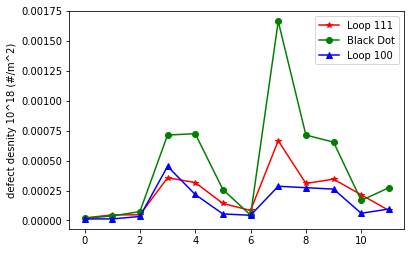

In [12]:
# Plot Loop Density
plt.plot(allDefectsDensity[0], marker = '*',color='red', label='Loop 111')
plt.plot(allDefectsDensity[1], marker = 'o',color='green', label='Black Dot')
plt.plot(allDefectsDensity[2], marker = '^',color='blue', label='Loop 100')
plt.legend()
plt.ylabel("defect desnity 10^18 (#/m^2)")
plt.show()

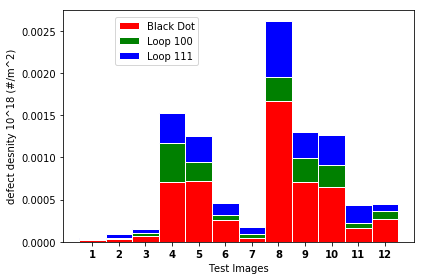

In [17]:
# Stack Plot of Loop Density
# Heights of bars
fig, axs = plt.subplots(1, 1, tight_layout=True)
bars = np.add(allDefectsDensity[1] , allDefectsDensity[2] ).tolist()
barWidth = 1

# Names of group and bar width
names = ['1','2','3','4','5','6','7','8','9','10','11','12']

imgId = [0,1,2,3,4,5,6,7,8,9,10,11] # The position of the bars on the x-axis

# Black Dot (bottom)
plt.bar(imgId, allDefectsDensity[1], color='red', edgecolor='white', width=barWidth, label='Black Dot')
# Loop 100
plt.bar(imgId , allDefectsDensity[2], bottom=allDefectsDensity[1], color='green', edgecolor='white', width=barWidth, label='Loop 100')
# Loop 111 (top)
plt.bar(imgId , allDefectsDensity[0], bottom = bars , color='blue', edgecolor='white', width=barWidth, label='Loop 111')
 
# Custom X axis
plt.xticks(imgId , names, fontweight='bold')
plt.xlabel("Test Images")
plt.ylabel("defect desnity 10^18 (#/m^2)")
plt.legend(bbox_to_anchor=(0.4, 0.99))
# Show graphic
plt.show()
fig.savefig('human_density.png',dpi=300)


In [20]:
allDefectsDensity

[[0.0003448275862068965,
  8.323424494649227e-05,
  4.6711273829061985e-05,
  0.00014160766347355268,
  4.581424406497293e-05,
  0.0003165347771761766,
  0.0002140309155766944,
  2.0824656393169513e-05,
  0.000356718192627824,
  8.332281277616462e-05,
  0.00030915576694411415,
  0.0006658739595719382],
 [0.0006539833531510107,
  0.0002734839476813317,
  7.322307789420527e-05,
  0.00025822573927530195,
  3.748438150770512e-05,
  0.000724698042482299,
  0.00016646848989298454,
  1.665972511453561e-05,
  0.000713436385255648,
  4.418634010857215e-05,
  0.000713436385255648,
  0.0016646848989298453],
 [0.0002615933412604043,
  9.512485136741974e-05,
  3.2824138366367886e-05,
  5.4144106622240735e-05,
  1.2494793835901708e-05,
  0.00021657642648896294,
  5.945303210463734e-05,
  1.2494793835901708e-05,
  0.00045184304399524376,
  4.2923873248327235e-05,
  0.0002734839476813317,
  0.0002853745541022592]]

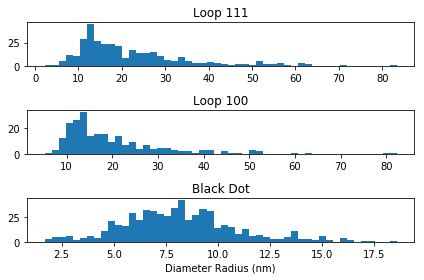

In [18]:
# Plot Radius Distribution
fig, axs = plt.subplots(3, 1, tight_layout=True)

plt.subplot(311)
plt.hist(allDefectsReff[0], bins=50)
#plt.ylabel("Frequency")
plt.title("Loop 111")
#axs[0].xlabel("Loop Radius (nm)")
plt.subplot(312)
plt.title("Loop 100")
plt.hist(allDefectsReff[2], bins=50)
#axs[1].ylabel("Frequency")
#axs[1].xlabel("Loop Radius (nm)")
plt.subplot(313)
plt.title("Black Dot")
plt.hist(allDefectsReff[1], bins=50)
#axs[2].ylabel("Frequency")
plt.xlabel("Diameter Radius (nm)")
plt.show()
fig.savefig('huaman_size.png',dpi=300)

In [15]:
# get Standard Error of the Mean
# just std/sqrt(n)

for defect in allDefectsReff:
    print np.mean(defect)
    print len(defect)
    print np.std(defect)/(np.sqrt(len(defect)))
    

22.425270435884382
353
0.699036242858687
8.198191729388547
589
0.11624644486171566
20.261836943401285
233
0.7796465632567321
